<a href="https://colab.research.google.com/github/PedrodJBS/Data-scientist/blob/main/DS_C3SC1_Pedro_Becerra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [6]:
import pandas as pd
happiness_df = pd.read_csv("/content/sample_data/Happiness_report.csv")
mexico = happiness_df[happiness_df["Country or region"] == "Mexico"].set_index("Country or region")
print(mexico)

                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

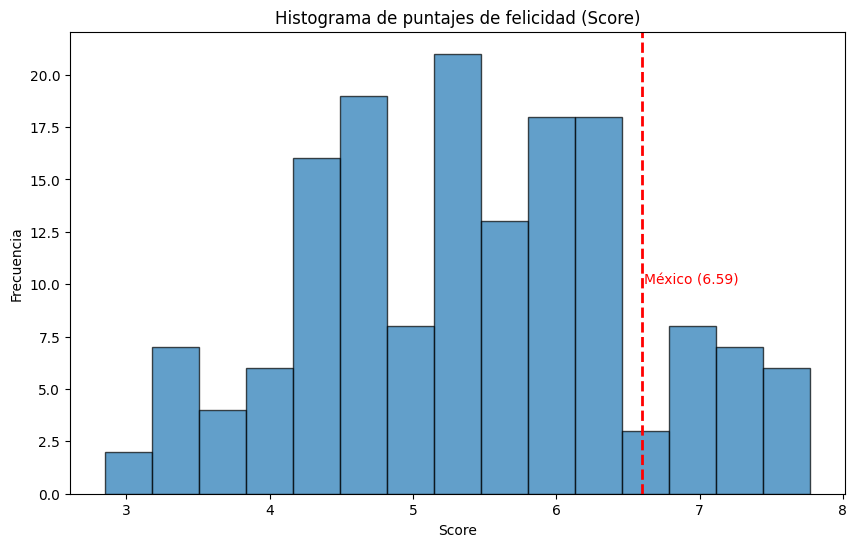

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
happiness_df = pd.read_csv("/content/sample_data/Happiness_report.csv")
mexico = happiness_df[happiness_df["Country or region"] == "Mexico"].set_index("Country or region")
plt.figure(figsize=(10,6))
plt.hist(happiness_df["Score"], bins=15, edgecolor="black", alpha=0.7)
mexico_score = mexico["Score"].values[0]
plt.axvline(mexico_score, color="red", linestyle="--", linewidth=2)
plt.text(mexico_score+0.02, 10, f"México ({mexico_score:.2f})", color="red")
plt.title("Histograma de puntajes de felicidad (Score)")
plt.xlabel("Score")
plt.ylabel("Frecuencia")
plt.show()

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

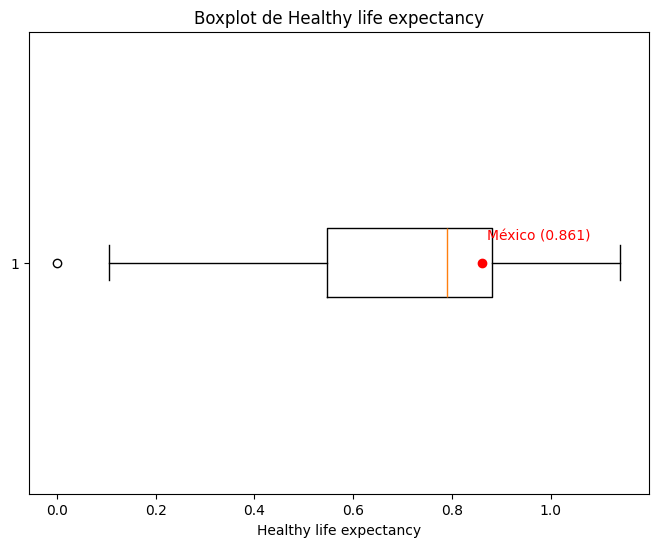

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

happiness_df = pd.read_csv("/content/sample_data/Happiness_report.csv")
mexico = happiness_df[happiness_df["Country or region"] == "Mexico"].set_index("Country or region")

plt.figure(figsize=(8,6))
plt.boxplot(happiness_df["Healthy life expectancy"], vert=False)
mexico_life = mexico["Healthy life expectancy"].values[0]
plt.scatter(mexico_life, 1, color="red", zorder=5)
plt.text(mexico_life+0.01, 1.05, f"México ({mexico_life:.3f})", color="red")
plt.title("Boxplot de Healthy life expectancy")
plt.xlabel("Healthy life expectancy")
plt.show()

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

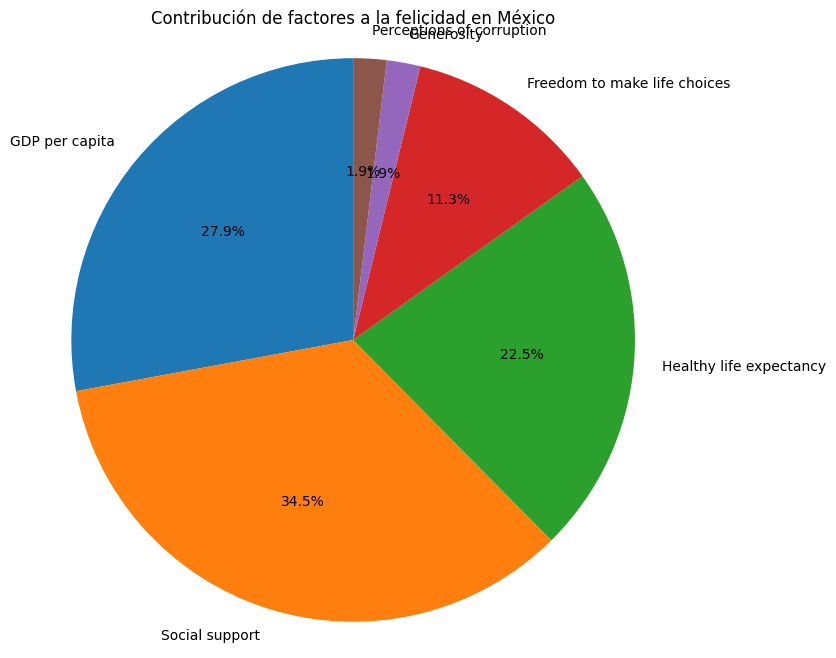

In [11]:
import matplotlib.pyplot as plt

factores = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
valores = mexico.loc["Mexico", factores].values

plt.figure(figsize=(8, 8))
plt.pie(valores, labels=factores, autopct="%1.1f%%", startangle=90)
plt.title("Contribución de factores a la felicidad en México")
plt.axis("equal")
plt.show()


Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

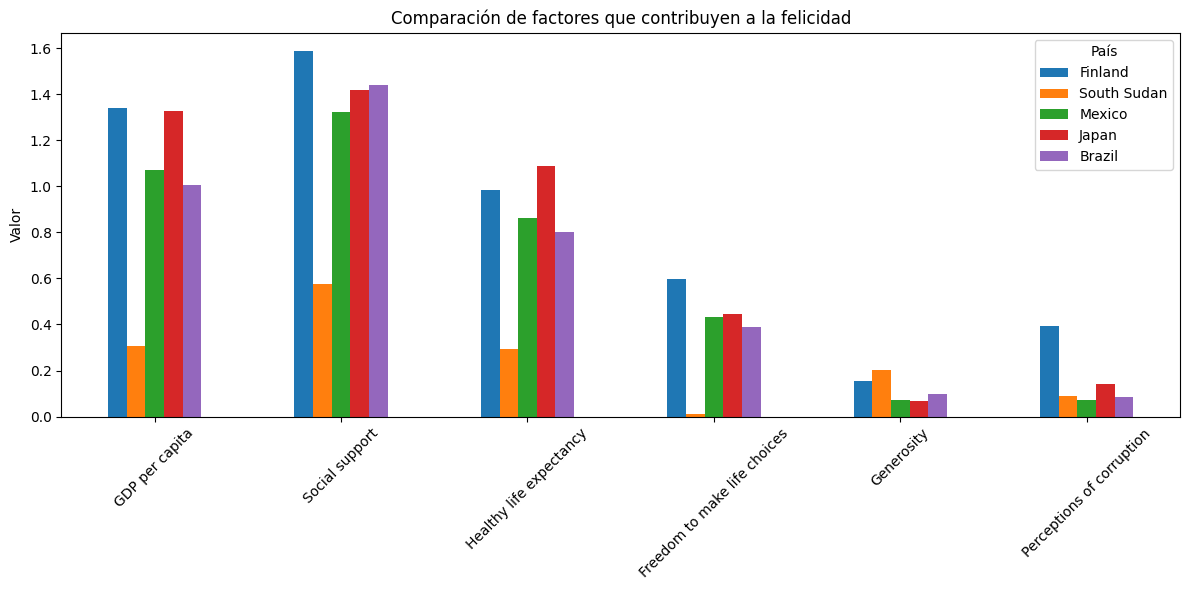

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

happiness_df = pd.read_csv("/content/sample_data/Happiness_report.csv")
mexico = happiness_df[happiness_df["Country or region"] == "Mexico"]

top = happiness_df.sort_values("Score", ascending=False).iloc[0]
bottom = happiness_df.sort_values("Score", ascending=True).iloc[0]
extra1 = happiness_df[happiness_df["Country or region"] == "Japan"].iloc[0]
extra2 = happiness_df[happiness_df["Country or region"] == "Brazil"].iloc[0]

selected = pd.DataFrame([top, bottom, mexico.iloc[0], extra1, extra2])
selected = selected.set_index("Country or region")

factores = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

selected_factores = selected[factores]

selected_factores.T.plot(kind="bar", figsize=(12,6))
plt.title("Comparación de factores que contribuyen a la felicidad")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="País")
plt.tight_layout()
plt.show()


Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

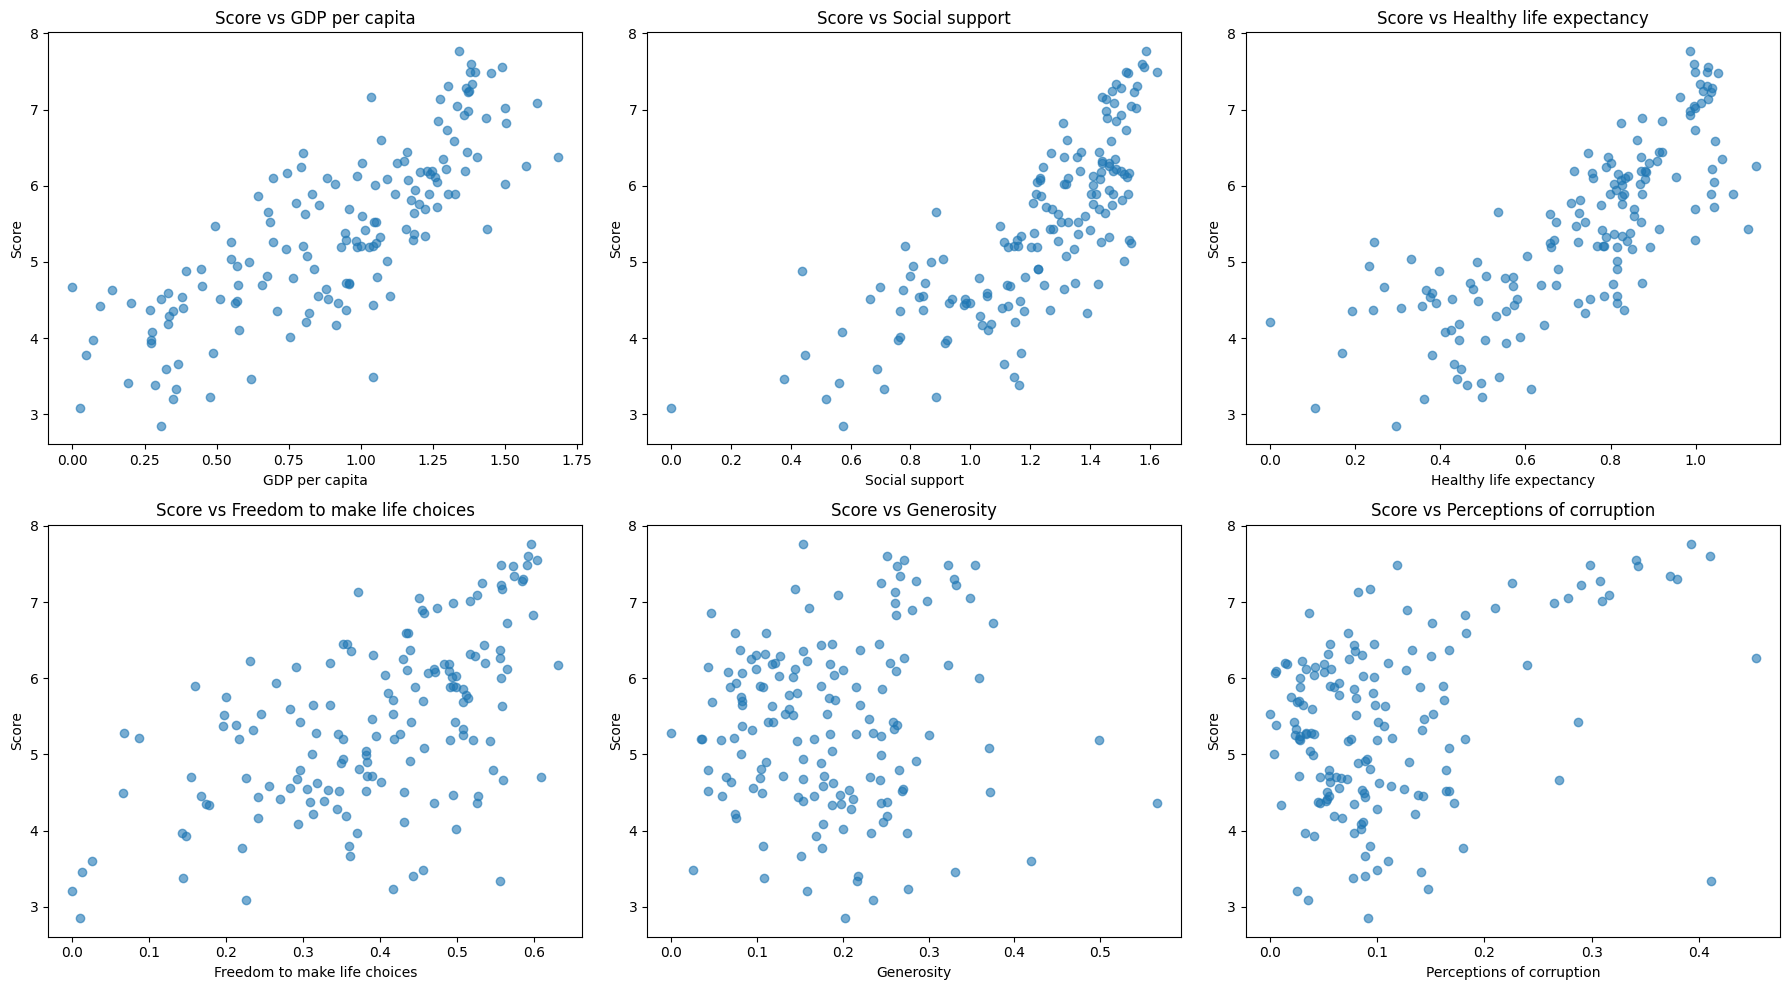

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

happiness_df = pd.read_csv("/content/sample_data/Happiness_report.csv")

factores = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

plt.figure(figsize=(18, 10))

for i, factor in enumerate(factores, 1):
    plt.subplot(2, 3, i)
    plt.scatter(happiness_df[factor], happiness_df["Score"], alpha=0.6)
    plt.title(f"Score vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

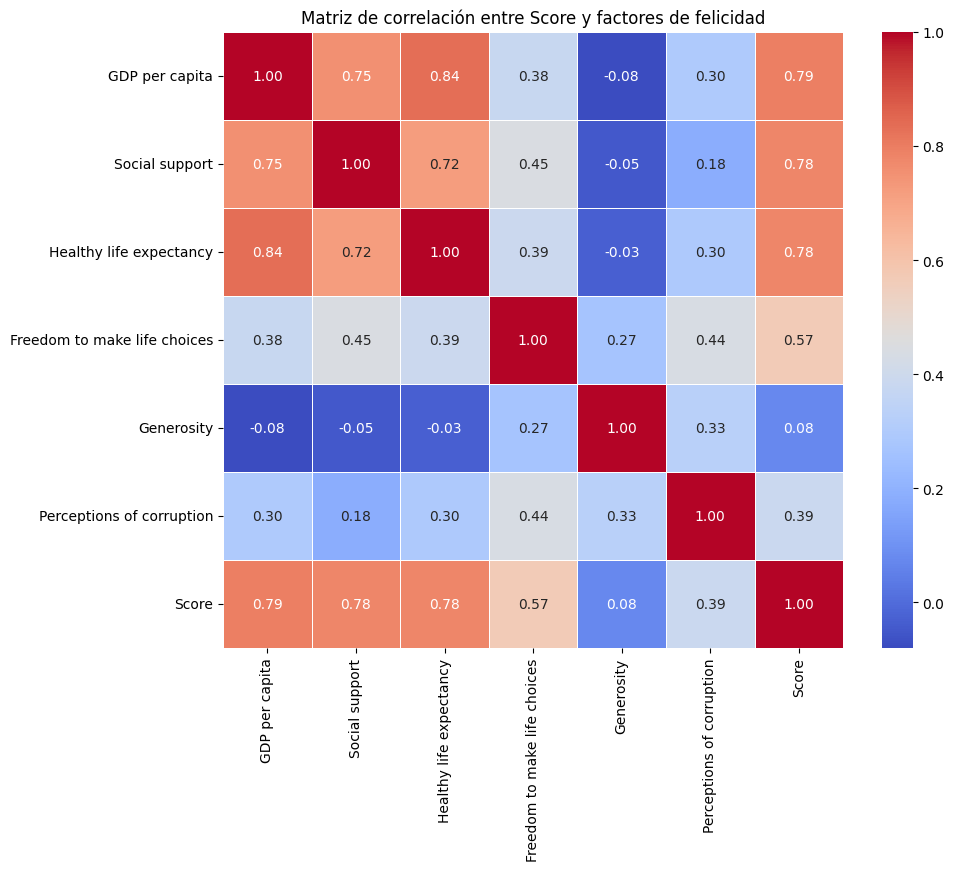

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

factores = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Score"]
correlaciones = happiness_df[factores].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre Score y factores de felicidad")
plt.show()

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

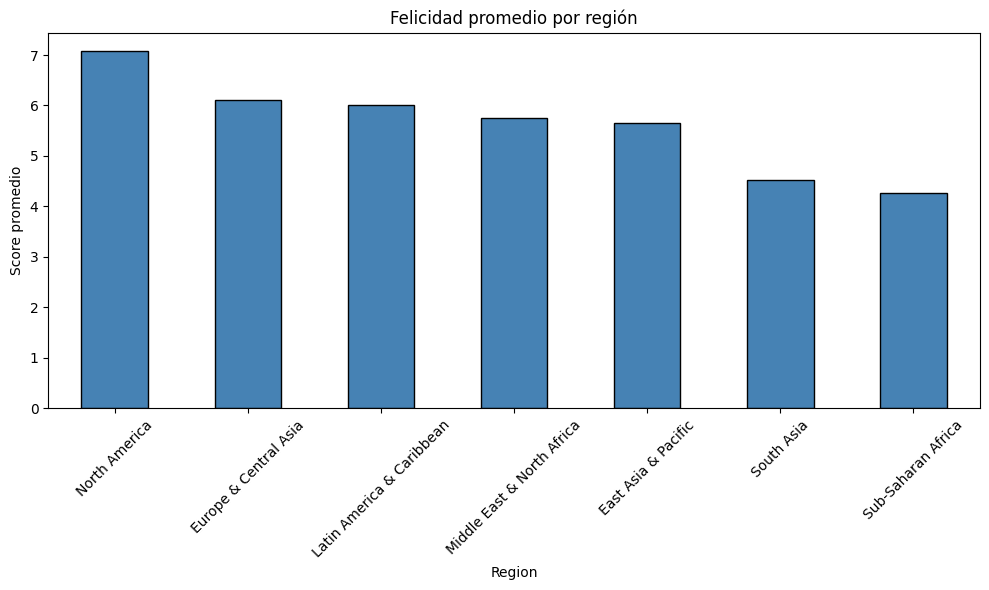

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

happiness_df = pd.read_csv("/content/sample_data/Happiness_report.csv")
metadata_df = pd.read_csv("/content/sample_data/Metadata.csv")

merged_df = pd.merge(happiness_df, metadata_df, left_on="Country or region", right_on="TableName")

region_avg = merged_df.groupby("Region")["Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
region_avg.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Felicidad promedio por región")
plt.ylabel("Score promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
